# Notebook Imports

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# from sklearn.datasets import load_boston
# ImportError: 
# `load_boston` has been removed from scikit-learn since version 1.2.

# In this special case, you can fetch the dataset from the original source:

# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [3]:
# print(type(raw_df))
# print(type(data))
# print(type(target))

# Output:
# <class 'pandas.core.frame.DataFrame'>
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

1. Problem Definition

- First step in data science/ML: define the problem clearly and ask the right questions.

- Boston housing example: friend asks “How much does a house cost in Boston?” — without more info, the only valid answer is the average home price (~$567,500).

- Shows why vague or poorly phrased questions → weak solutions.

2. Real-World Example (Boston Housing)

- Factors affecting price: size of house, location (downtown/suburbs), features (rooms, crime, schools, etc.).

- Boss’s project: build a valuation tool for real estate agents in Boston.

Tool must:

- Predict house price based on features.

- Show contribution of each feature (interpretable, not a black box).

- Provide quick benchmark prices.

- Be user-friendly (could even be public like Zillow/Zoopla).

3. Key Takeaways

- Always start with clear, well-phrased goals.

- Need both relevant features and interpretable models.

- The “average price” approach works only when no other info is available, but it’s too simplistic for real-world use.

## It didn't work as expected...
### sklearn has removed the boston dataset due to ethical issues.
### Here are the notes anyway:

1. Data Gathering

- After defining the problem, the next step in DS/ML is gathering the data.

Typical sources:

- Downloading CSVs from online (Google search).

- Using practice datasets from Python libraries (e.g., scikit-learn).

- Scikit-learn provides clean, user-friendly toy datasets (few missing values, fewer formatting issues).

- Examples: Boston housing, Iris (flowers), Diabetes, Digits, Wine, Breast Cancer.

**Summary:**

The second stage in ML is data gathering. Scikit-learn used to offer clean practice datasets like the Boston housing dataset, which contained 506 samples and 13 features. After importing with load_boston, the data was stored in a Bunch object. While raw output was messy, the dataset was available in Jupyter, ready for exploration and preprocessing.

# CHANGE OF PLANS:
### We will use the California housing dataset instead.

# IMPORTING DATASET

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

We can also Add original paper as a clickable link using Markdown [text]\(URL\).

[Click here to see the original dataset source](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [5]:
type(housing) # Note: convert to DataFrame later for easier handling.

sklearn.utils._bunch.Bunch

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

1. **Exploring the Dataset**

After defining the problem and gathering data, next step = exploring the dataset.

Exploration, visualization, and cleaning often happen together (issues only appear once you dig in).

Good starting questions for any dataset:

- What’s the source of the data?

- Is there a description/context of how it was collected?

- How many data points (rows)?

- How many features (columns)?

- What are the names of the features?

- What are the descriptions/units of the features?

In [7]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [8]:
print(type(housing.DESCR))
print(housing.DESCR)

<class 'str'>
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using 

In [9]:
print(type(housing.data))
print(housing.data.shape)
print(housing.data)

<class 'numpy.ndarray'>
(20640, 8)
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
print(type(housing.target))
print(housing.target) 

# Target (house price) is not in features; found in boston_dataset.target.
# Prices look small (24, 21, etc.) → units are in $1000s (e.g., 24 = $24,000).

<class 'numpy.ndarray'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(type(housing.feature_names))
print(housing.feature_names)

# boston_dataset.feature_names → prints all feature names (array).

<class 'list'>
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
print(type(housing.frame))
print(housing.frame)

<class 'NoneType'>
None


Dot notation & nesting:

- california_housing → Bunch object.

- .data → numpy array.

- .shape → tuple (rows, columns).

- Like Inception, dreams within dreams.

**Summary:**

Exploring a dataset begins with six key questions about its source, size, and features. The California dataset has 2000+ samples and 8 attributes, with context provided by its original research study. Using '.DESCR' and '.shape' in Python helps confirm this information. Data exploration not only reveals structure but also teaches how Python objects nest attributes inside one another.

# Continuing Exploration

### 1. Attributes, Features & Targets

Important distinction:

- In Python → “attribute” = property of an object.

- In ML → “attribute” usually means feature/independent variable (columns in dataset).

### 2. Converting to Pandas DataFrame

Pandas DataFrame = main workhorse in ML/DS.

In [15]:
housing_data = pd.DataFrame(data= housing.data, columns= housing.feature_names)
housing_data['House Price']= housing.target

In [ ]:
# Explore DataFrame quickly:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
housing_data.tail()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [20]:
housing_data.count()

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
House Price    20640
dtype: int64

### Vocabulary check:

Instance (ML) = a row/data point.

Instance (programming) = an object of a class.

## 3. Checking for Missing Values

Why? ML algorithms break if fed missing data.

In [21]:
# pandas tools:
pd.isnull(housing_data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(housing_data).any() # better way

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
House Price    False
dtype: bool

In [ ]:
housing_data.info() # more details with a single command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   House Price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Summary:**

This lesson clarified the meaning of attributes/features in ML, showed how to extract feature names and targets, and converted the California dataset into a Pandas DataFrame for easier work. We practiced quick exploration with .head(), .tail(), .count(), and checked for missing values using isnull() and info(). Good news: the dataset has no missing values, so we’re ready to start digging into feature meanings.

## 1. Why Visualize Data?

Visualization helps at exploration stage, not just final reporting.

Two main goals when exploring:

- Understand distribution of variables.

- Spot outliers (values far from the rest).

### First visualization tool:
### Histogram (bar chart showing frequency of values).

A “normal distribution” looks like a bell curve; real-world data (like California house prices) is usually messier with outliers.

### 2. Creating Histograms with Matplotlib

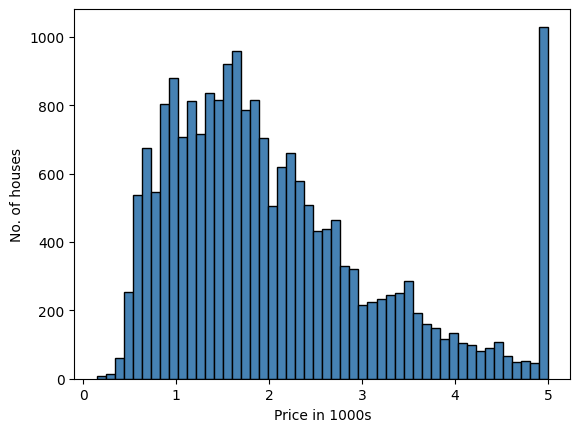

In [41]:
plt.hist(housing_data["House Price"], bins= 50, ec= 'black', color= 'steelblue') # customization
plt.Figure(figsize=(20, 15)) # not working
plt.xlabel("Price in 1000s")
plt.ylabel("No. of houses")

plt.show()

### 3. Key Insights & Next Steps

- Histogram of prices = uneven distribution with clear outliers (very high house values).

- Good reminder: real-world data ≠ neat bell curve.

- Ronald Reagan quote: “Trust but verify” → always check visuals yourself.

- Matplotlib works, but there are other libraries for visualization → next up is Seaborn.

**Summary:**

Histograms are the first visualization step in data exploration. They reveal data distributions and highlight outliers, making them essential before modeling. Using matplotlib, we can plot, style, and label histograms of house prices. The Boston housing data shows a skewed distribution with high-value outliers, reminding us that real-world data rarely follows perfect statistical patterns.

## 1. Seaborn Basics

Seaborn = built on matplotlib, but with extra features and prettier defaults.

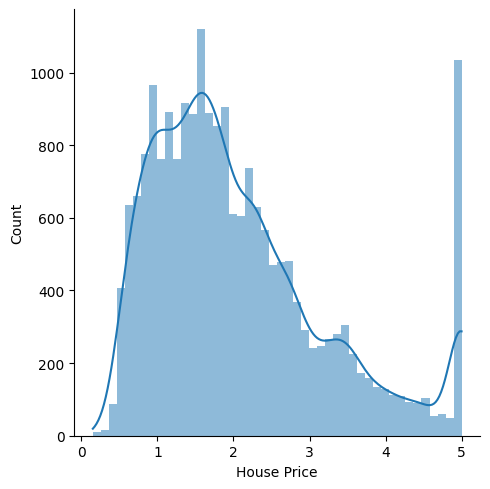

In [48]:
sns.displot(housing_data["House Price"], kde= True, ec= 'None')
plt.show()

# histogram + probability density function (PDF)

### 2. Comparing Features

Explore Average Rooms

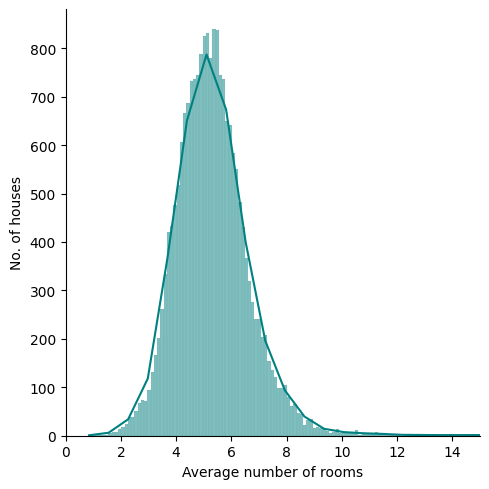

In [58]:
sns.displot(housing_data["AveRooms"], ec= 'black', kde= True, color="#008080")  # teal
plt.xlabel("Average number of rooms")
plt.ylabel("No. of houses")
plt.xlim(0, 15)
plt.show()

Histogram shows peak around 5-6 rooms.

Exact calculation:

In [60]:
print(housing_data["AveRooms"].mean())

5.428999742190376


In [61]:
print(housing_data["AveRooms"].min())

0.8461538461538461


In [62]:
print(housing_data["AveRooms"].max())

141.9090909090909


### 3. Key Insights & Next Steps

- Seaborn makes visualization simpler and more informative (with PDF overlay).

- Distribution of PRICE: messy, skewed, outliers.

- Distribution of AvgRM: centered around 5-6 rooms, mean = 5.4...

- Combining visual inspection (histograms) + statistical summaries (mean) = stronger understanding of features.

**Summary:**

Seaborn builds on matplotlib, offering easier syntax and attractive defaults like adding PDFs to histograms. By exploring the RM feature, we see Boston homes average about 6.28 rooms. Together, visualizations and summary statistics help confirm insights about dataset features, preparing us for deeper analysis.

In [63]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Exploring the HouseAge Feature

First attempt: histogram looked odd (automatic binning hid info).

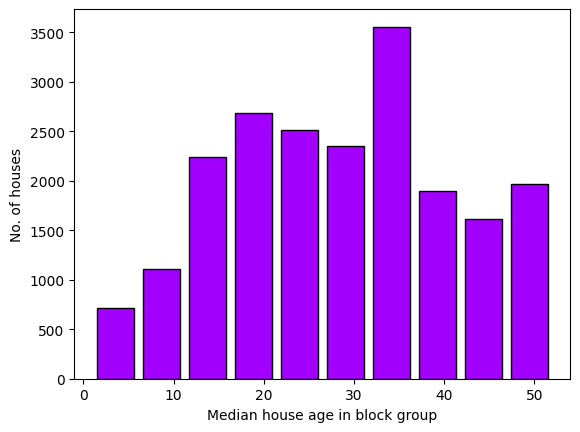

In [83]:
plt.hist(housing_data["HouseAge"], ec= 'black', color= "#a200ff", rwidth= 0.8)
plt.xlabel("Median house age in block group")
plt.ylabel("No. of houses")

plt.show()

In [94]:
freq = housing_data["HouseAge"].value_counts() # Shows frequency of each HouseAge value.
print(freq)

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64


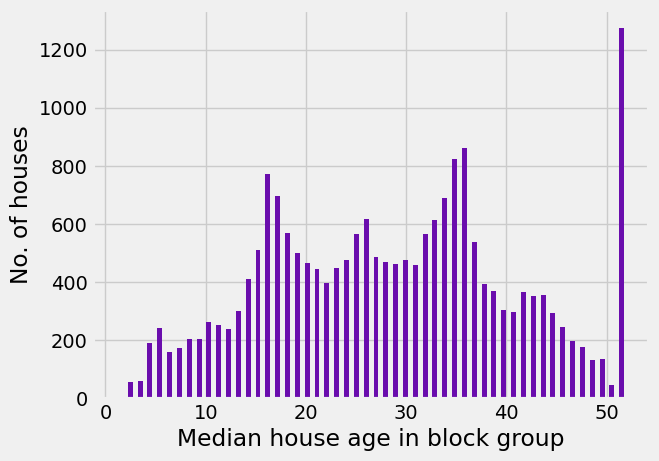

In [ ]:
# Fix: specify bins to match index values:
plt.style.use('fivethirtyeight')
plt.hist(housing_data["HouseAge"], bins=52, color="#6A0DAD", rwidth=0.5)  # royal purple
plt.xlabel("Median house age in block group")
plt.ylabel("No. of houses")

plt.show()

### 2. Bar Charts with Matplotlib

Created bar chart using value counts for flexibility

Advantage: no need to hardcode number of bins.

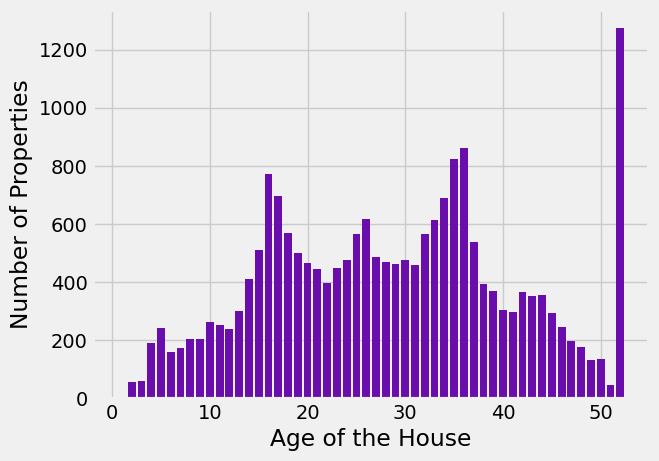

In [95]:
plt.bar(freq.index, freq, color="#6A0DAD")
plt.xlabel("Age of the House")
plt.ylabel("Number of Properties")
plt.show()

### 3. CHAS Feature (Charles River Dummy Variable)
### was for Boston housing dataset

CHAS = dummy variable (binary):

1 = property bounds Charles River.

0 = property not on river.

Count with:

data["CHAS"].value_counts()


Output: 35 properties on river (CHAS=1), rest not.

Dummy variables capture binary info (e.g., yes/no, male/female, employed/unemployed).

**Summary:**

We explored RAD, an index feature, and learned that histograms need tailored bins when working with discrete values. Using value_counts() + bar charts provides a flexible alternative to histograms. We also introduced CHAS, a dummy variable for riverfront properties, finding 35 such cases. Indexes and dummy variables are powerful tools for encoding categorical or binary data in ML.